In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# ====== 1. Load Dataset ======
df = pd.read_csv("dataset_fix.csv")

In [3]:
label_mapping = {'positif': 1, 'negatif': 0, 'netral': 2}
df = df[df['label_sentimen'].isin(label_mapping.keys())]
df['label_sentimen'] = df['label_sentimen'].map(label_mapping)
df['label_sentimen'] = df['label_sentimen'].astype(int)

In [4]:
df = df[df['komentar_bersih'].notnull()]
df = df[df['komentar_bersih'].str.strip() != '']
df = df[df['komentar_bersih'].str.len() > 2]

In [5]:
stop_factory = StopWordRemoverFactory()
stopwords_id = set(stop_factory.get_stop_words())

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords_id])

df['komentar_bersih'] = df['komentar_bersih'].apply(remove_stopwords)

In [6]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['komentar_bersih'])
y = df['label_sentimen']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = MultinomialNB(alpha=0.3)  # alpha bisa dituning
model.fit(X_train, y_train)

,alpha,0.3
,force_alpha,True
,fit_prior,True
,class_prior,None


In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Naive Bayes: {accuracy * 100:.2f}%")

Akurasi Model Naive Bayes: 78.21%


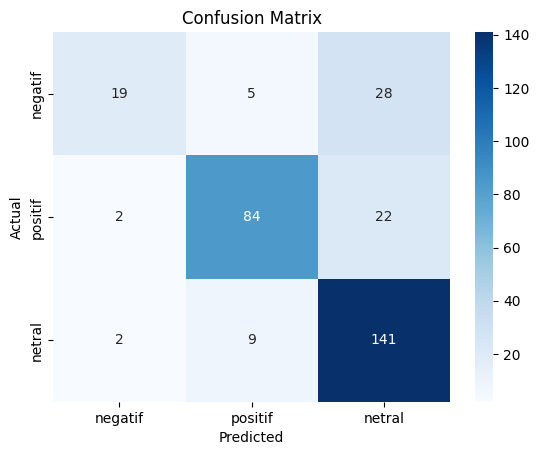

In [10]:
label_classes = ['negatif', 'positif', 'netral']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_classes, yticklabels=label_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("model/Confusion Matrix_Naive Bayes.png")
plt.show()

In [14]:
print("Evaluasi Per Kelas:")
print(classification_report(y_test, y_pred, target_names=['Negatif', 'Positif', 'Netral']))
print(f"Akurasi Model NaiveBayes: {accuracy * 100:.2f}%")

Evaluasi Per Kelas:
              precision    recall  f1-score   support

     Negatif       0.83      0.37      0.51        52
     Positif       0.86      0.78      0.82       108
      Netral       0.74      0.93      0.82       152

    accuracy                           0.78       312
   macro avg       0.81      0.69      0.71       312
weighted avg       0.79      0.78      0.77       312

Akurasi Model NaiveBayes: 78.21%


In [ ]:
os.makedirs("model", exist_ok=True)
with open("model/naive_bayes_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("model/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
